# Most Crowded Countries in The World

## Getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/proj43/MostCrowded100inWorld.csv")
df.head()

,Rank,Country/Dependency,Population,Unnamed: 3,Date,Source (official or from the United Nations,Notes
0,NaN,NaN,Numbers,% of the world,NaN,NaN,NaN
1,-,World,"8,001,166,000",100%,26 Dec 2022,UN projection[3],-
2,1.,China,"1,412,600,000",17.7%,31 Dec 2021,Official estimate[4],The population figure refers to mainland China...
3,2.,India,"1,375,586,000",17.2%,1 Mar 2022,Official projection[5],The figure includes the population of the Indi...
4,3.,United States,"334,200,979",4.18%,24 Dec 2022,National Population clock[6],The figure includes the 50 states and the Dist...


In [3]:
df.describe()

,Rank,Country/Dependency,Population,Unnamed: 3,Date,Source (official or from the United Nations,Notes
count,102,102,103,103,102,102,94
unique,102,102,103,97,33,94,16
top,-,World,Numbers,0.277%,1 Jul 2021,UN projection[3],-
freq,1,1,1,2,21,9,79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rank                                         102 non-null    object
 1   Country/Dependency                           102 non-null    object
 2   Population                                   103 non-null    object
 3   Unnamed: 3                                   103 non-null    object
 4   Date                                         102 non-null    object
 5   Source (official or from the United Nations  102 non-null    object
 6   Notes                                        94 non-null     object
dtypes: object(7)
memory usage: 5.8+ KB


## Cleaning the data

In [5]:
df.isna().sum()

Rank                                           1
Country/Dependency                             1
Population                                     0
Unnamed: 3                                     0
Date                                           1
Source (official or from the United Nations    1
Notes                                          9
dtype: int64

In [8]:
df.drop(["Notes", "Date", "Unnamed: 3", "Source (official or from the United Nations"], inplace=True, axis=1)
df.isna().sum()

Rank                  1
Country/Dependency    1
Population            0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Rank                  0
Country/Dependency    0
Population            0
dtype: int64

## Exploring the data

In [10]:
df["Country/Dependency"].value_counts()

World           1
Kazakhstan      1
Zimbabwe        1
Cambodia        1
Chad            1
               ..
Argentina       1
Kenya           1
Spain           1
Colombia        1
Sierra Leone    1
Name: Country/Dependency, Length: 102, dtype: int64

In [34]:

for i in range(len(df["Country/Dependency"])):
    df["Country/Dependency"][i+1] = df["Country/Dependency"][i+1].replace("\xa0", "")



In [36]:
df["Country/Dependency"].values

array(['World', 'China', 'India', 'United States', 'Indonesia',
       'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico',
       'Japan', 'Philippines', 'Ethiopia', 'Egypt', 'DR Congo', 'Vietnam',
       'Iran', 'Turkey', 'Germany', 'France', 'United Kingdom',
       'Thailand', 'Tanzania', 'South Africa', 'Italy', 'Myanmar',
       'South Korea', 'Colombia', 'Spain', 'Kenya', 'Argentina',
       'Algeria', 'Sudan', 'Uganda', 'Iraq', 'Ukraine', 'Canada',
       'Poland', 'Morocco', 'Uzbekistan', 'Saudi Arabia', 'Yemen', 'Peru',
       'Angola', 'Afghanistan', 'Malaysia', 'Mozambique', 'Ghana',
       'Ivory Coast', 'Nepal', 'Venezuela', 'Madagascar', 'Australia',
       'North Korea', 'Cameroon', 'Niger', 'Taiwan', 'Mali', 'Sri Lanka',
       'Syria', 'Burkina Faso', 'Malawi', 'Chile', 'Kazakhstan',
       'Romania', 'Zambia', 'Ecuador', 'Netherlands', 'Somalia',
       'Senegal', 'Guatemala', 'Chad', 'Cambodia', 'Zimbabwe',
       'South Sudan', 'Rwanda', 'Guinea', 'Bu

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 102
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                102 non-null    object
 1   Country/Dependency  102 non-null    object
 2   Population          102 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB


In [54]:
df["Rank"][58] = 56

In [61]:
for i in range(len(df["Population"])):
    df["Population"][i+1] = df["Population"][i+1].replace(",", "")
df["Population"].values

array(['8001166000', '1412600000', '1375586000', '334200979', '275773800',
       '235825000', '218541000', '215565116', '165158616', '145100000',
       '128533664', '125104000', '112869745', '105163988', '104243583',
       '99010000', '98506193', '86053807', '84680273', '84270625',
       '67975000', '67026292', '66875330', '61741120', '60604992',
       '58853482', '55294979', '51638809', '51049498', '47615034',
       '47564296', '47327407', '45400000', '45022870', '42885900',
       '41190700', '41130432', '39057175', '37796000', '36819074',
       '35959121', '35013414', '33697000', '33396698', '33086278',
       '32890171', '32760400', '31616078', '30832019', '29389150',
       '29192480', '28302000', '26923353', '26021936', '25660000',
       '24348251', '24112753', '23375314', '22594000', '22156000',
       '22125000', '21510181', '21507723', '19828563', '19377664',
       '19038098', '18400556', '18131372', '17778510', '17598000',
       '17223497', '17109746', '16818391', '

In [63]:
df["Rank"] = df["Rank"].astype("float64")
df["Population"] = df["Population"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 102
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                102 non-null    float64
 1   Country/Dependency  102 non-null    object 
 2   Population          102 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ KB


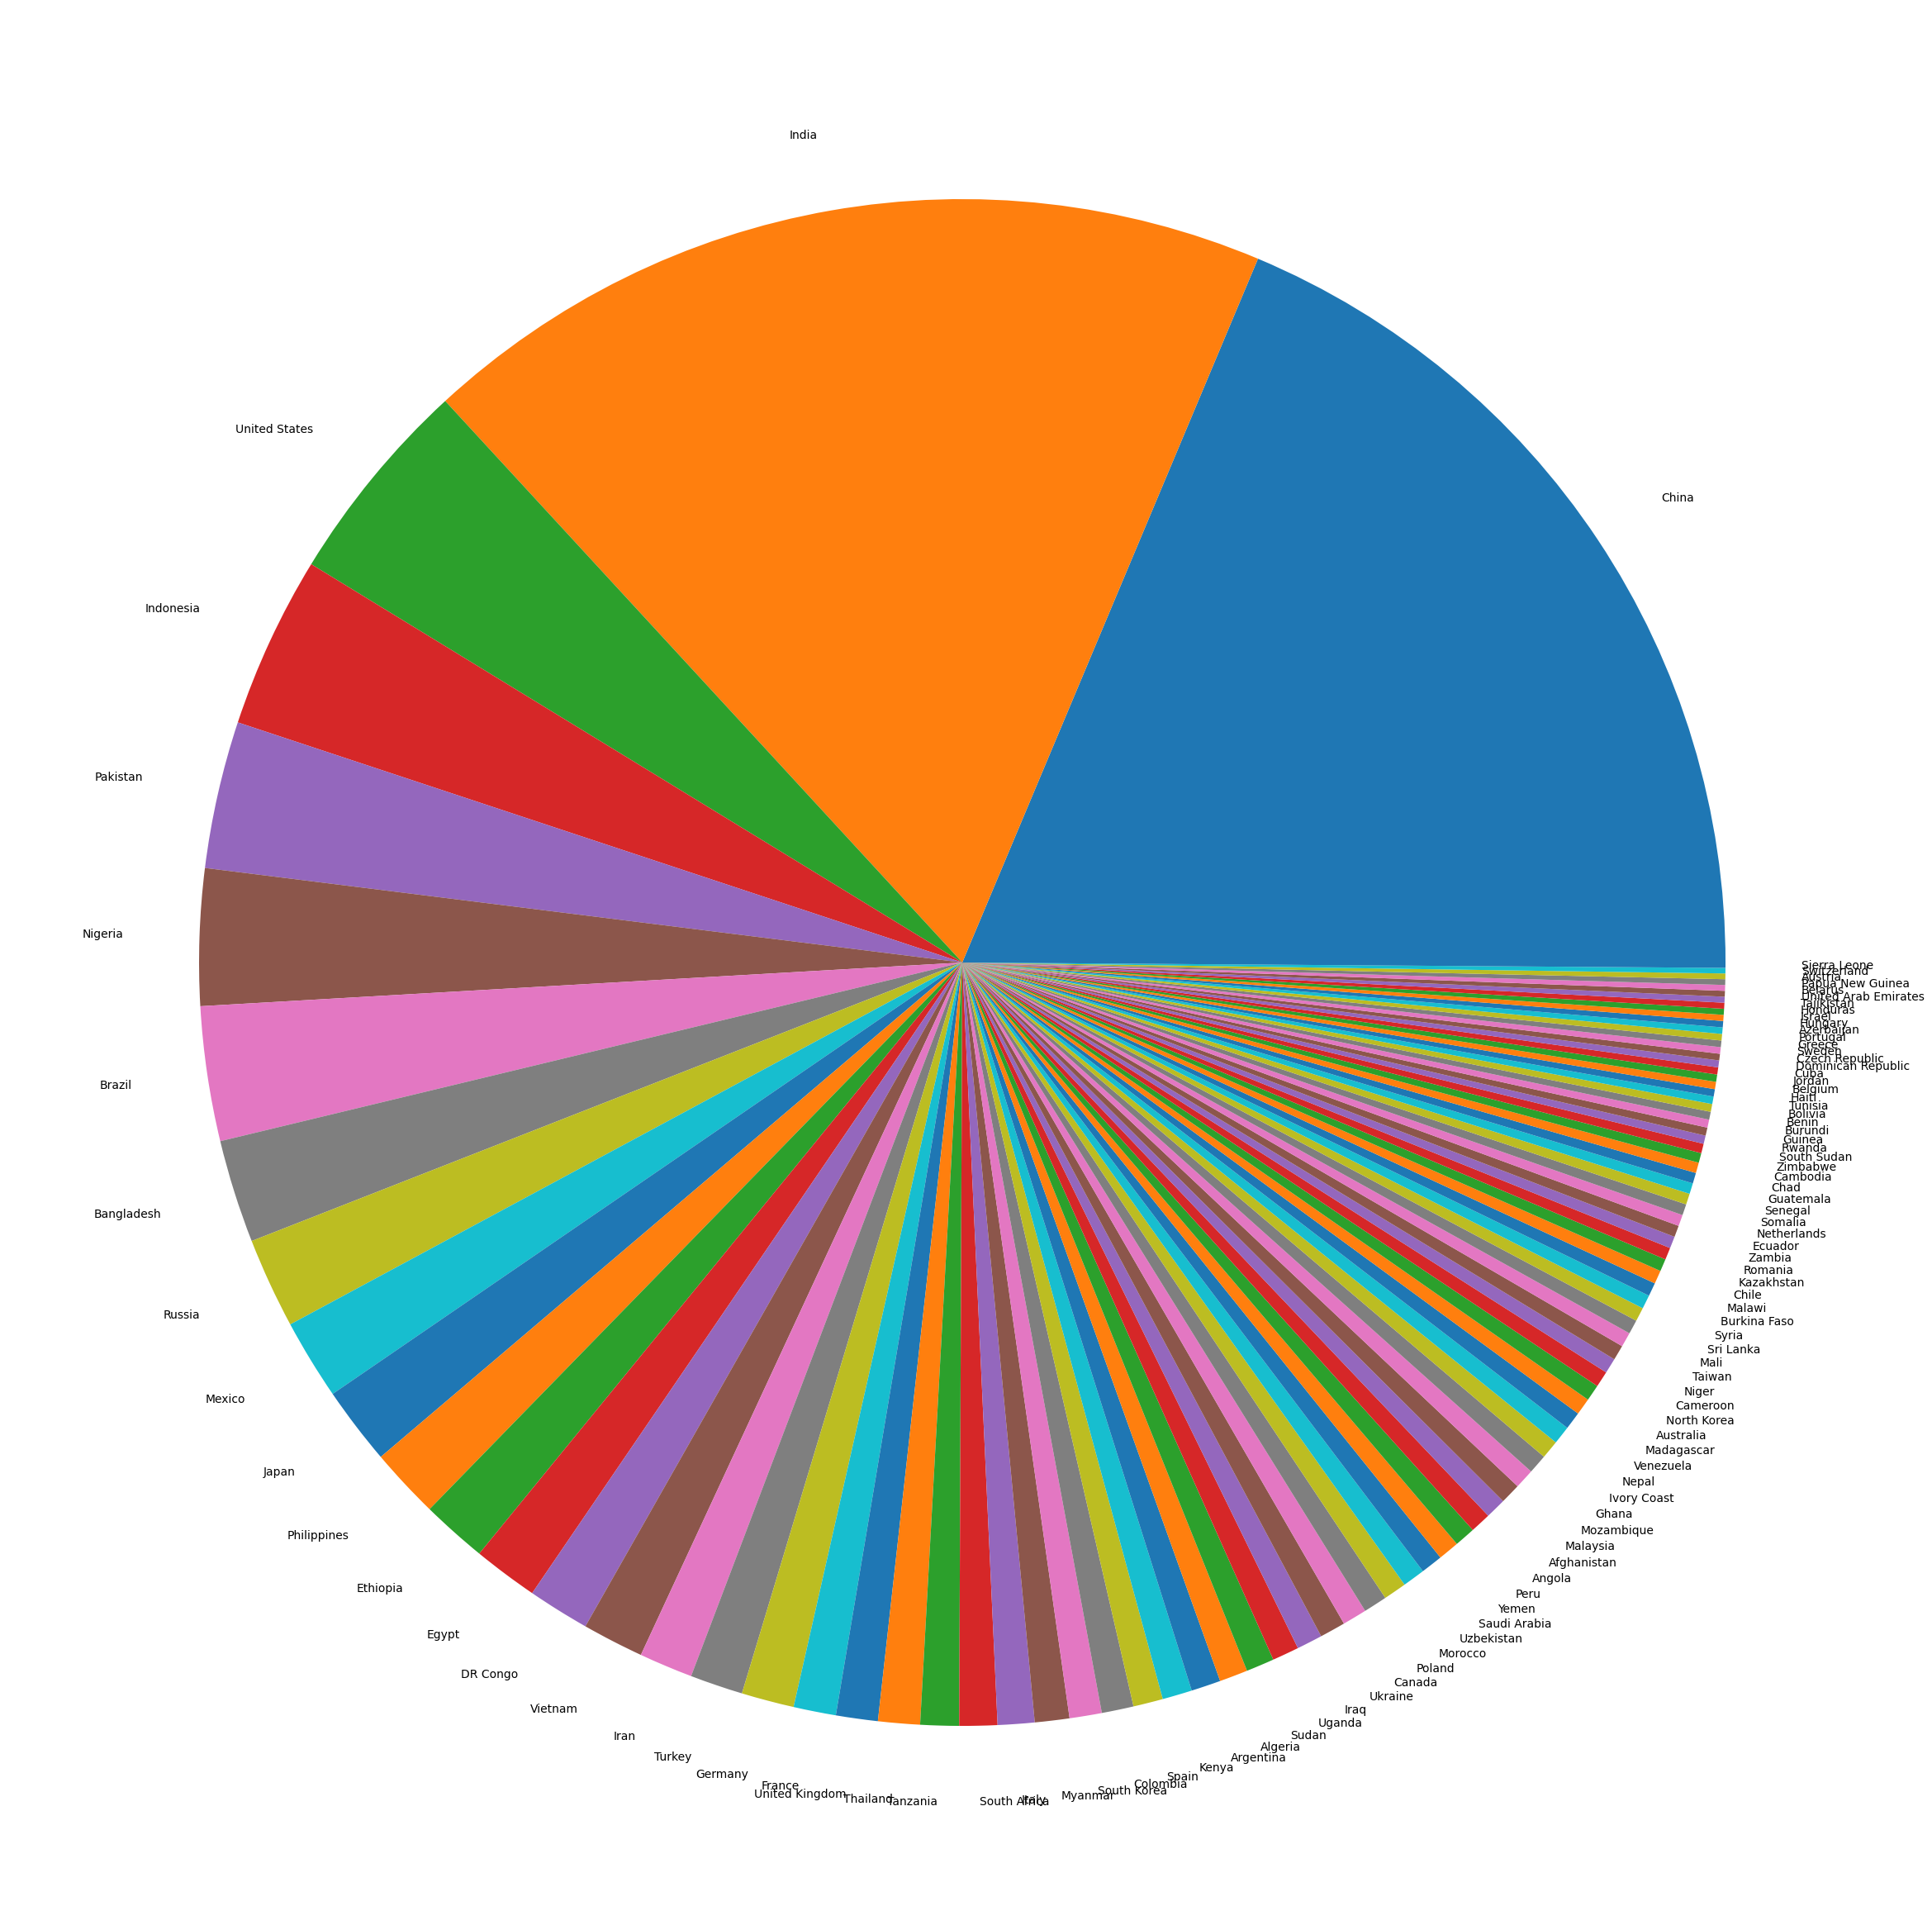

In [65]:
_, ax = plt.subplots(figsize=(30, 30))
ax.pie(x=df["Population"][1:], labels=df["Country/Dependency"][1:]);